## Basics
Some basic manipulations
! In order to plot t/f or spectrograms, you need to first make an Epoch. Which this is relatively simple, it is not at times super-intuitive. Or rather, it is intuitive IF you do the basic analysis that everyone does - but not when you do data exploration for resting-state data (which is what we do here)

- filtering
- epoching
- Spectrogram
- Averaging over Epochs
- Plotting Power between certain times
- Plotting Channel Layout
- Plotting Raw Data

In [4]:
raw_fromfile.filter(1, None)

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 3301 samples (3.301 sec) selected


<RawEEGLAB  |  None, n_channels x n_times : 14 x 633858 (633.9 sec), ~67.7 MB, data loaded>

In [5]:
raw_fromfile.filter(None, 45)

Setting up low-pass filter at 45 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 293 samples (0.293 sec) selected


<RawEEGLAB  |  None, n_channels x n_times : 14 x 633858 (633.9 sec), ~67.7 MB, data loaded>

In [6]:
raw_fromfile.notch_filter((45,55))

Setting up band-stop filter
Filter length of 6601 samples (6.601 sec) selected


<RawEEGLAB  |  None, n_channels x n_times : 14 x 633858 (633.9 sec), ~67.7 MB, data loaded>

In [7]:
from mne.viz import plot_topomap

In [8]:
evs=mne.find_events(raw_fromfile)

2558 events found
Event IDs: [  1   2   3   4   5   6   8   9  10  11  12  13  14  15  22  31  34  40
  41  42  45  46  48  50  51  52  55  56  60  64  81  82  83  84 128 131
 132 133 134 201 202 203 204 221 222 223 224 225 226 227 228 229 231 232
 233 234 241 242 243 244 245 246 247]


In [9]:
epoch=mne.Epochs(raw_fromfile, evs, 1, tmin=0, tmax=200)

45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [10]:
evs

array([[ 15335,      0,    229],
       [ 17552,      0,    221],
       [ 19766,      0,    222],
       ...,
       [597649,      0,    202],
       [600688,      0,    203],
       [625705,      0,    204]])

In [11]:
np.matrix([[1,2],[2,3]])[:,1].shape

(2, 1)

In [12]:
epoch=mne.Epochs(raw_fromfile, np.matrix([1, 0, 1]), 1, tmin=0, tmax=200)

1 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [13]:
epoch.plot_psd_topomap?

Signature: epoch.plot_psd_topomap(bands=None, vmin=None, vmax=None, tmin=None, tmax=None, proj=False, bandwidth=None, adaptive=False, low_bias=True, normalization='length', ch_type=None, layout=None, cmap='RdBu_r', agg_fun=None, dB=True, n_jobs=1, normalize=False, cbar_fmt='%0.3f', outlines='head', axes=None, show=True, verbose=None)
Docstring:
Plot the topomap of the power spectral density across epochs.

Parameters
----------
bands : list of tuple | None
    The lower and upper frequency and the name for that band. If None,
    (default) expands to:

    bands = [(0, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'),
             (12, 30, 'Beta'), (30, 45, 'Gamma')]

vmin : float | callable | None
    The value specifying the lower bound of the color range.
    If None np.min(data) is used. If callable, the output equals
    vmin(data).
vmax : float | callable | None
    The value specifying the upper bound of the color range.
    If None, the maximum absolute value is used. If callable

Loading data for 1 events and 200001 original time points ...
0 bad epochs dropped
    using multitaper spectrum estimation with 7 DPSS windows


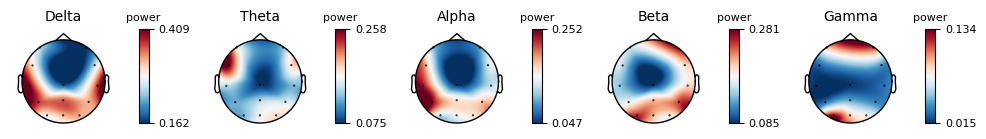

In [14]:
epoch.plot_psd_topomap( tmin=191, tmax=194, normalize=True)

In [15]:
freqs = np.logspace(*np.log10([2, 45]), num=50)

In [16]:
n_cycles = freqs / 2. 

In [17]:
from mne.time_frequency import tfr_morlet, psd_multitaper

In [18]:
power, itc = tfr_morlet(epoch, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

Loading data for 1 events and 200001 original time points ...


In [19]:
raw_fromfile.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'Cz',
 'C4',
 'P3',
 'Pz',
 'P4',
 'O1',
 'O2',
 'Oz',
 'STI 014']

Applying baseline correction (mode: logratio)


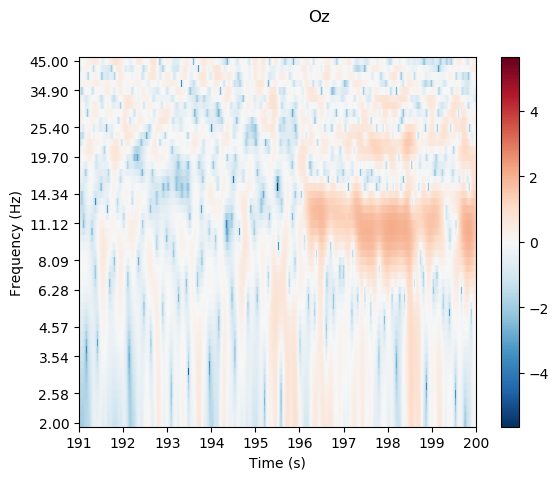

In [20]:
power.plot([12], baseline=(180, 190), tmin=191, tmax=201, mode='logratio')

In [21]:
evoked=epoch.average()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


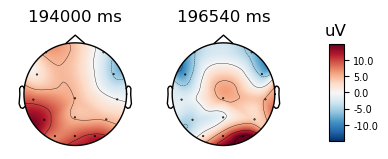

In [22]:
evoked.plot_topomap(times=[194, 196.540])

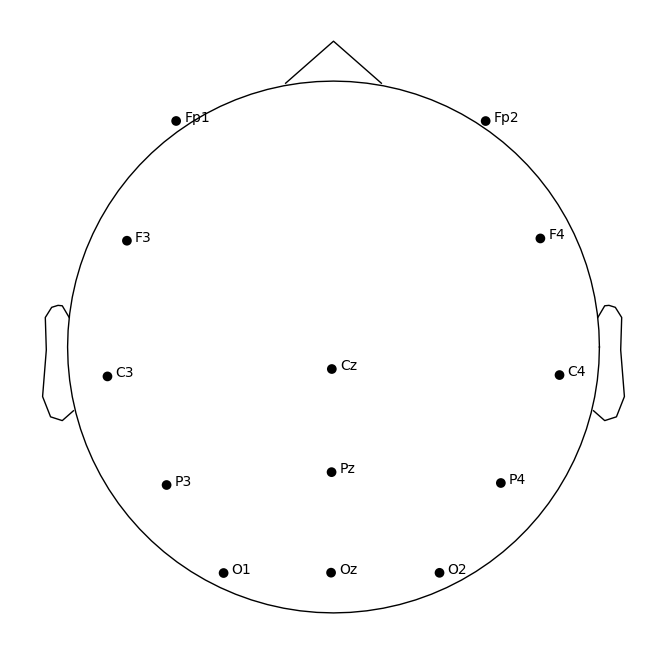

In [23]:
raw_fromfile.plot_sensors(title='', show_names=True)

In [36]:
evs[1]

array([17552,     0,   221])

Effective window size : 2.048 (s)


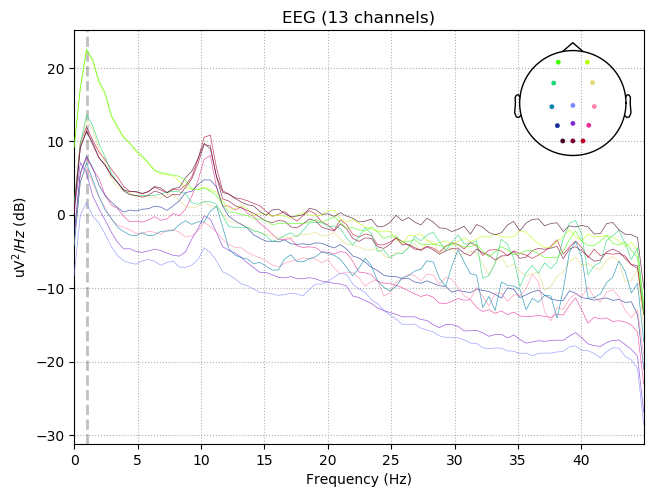

In [24]:
raw_fromfile.plot_psd(fmax=45)

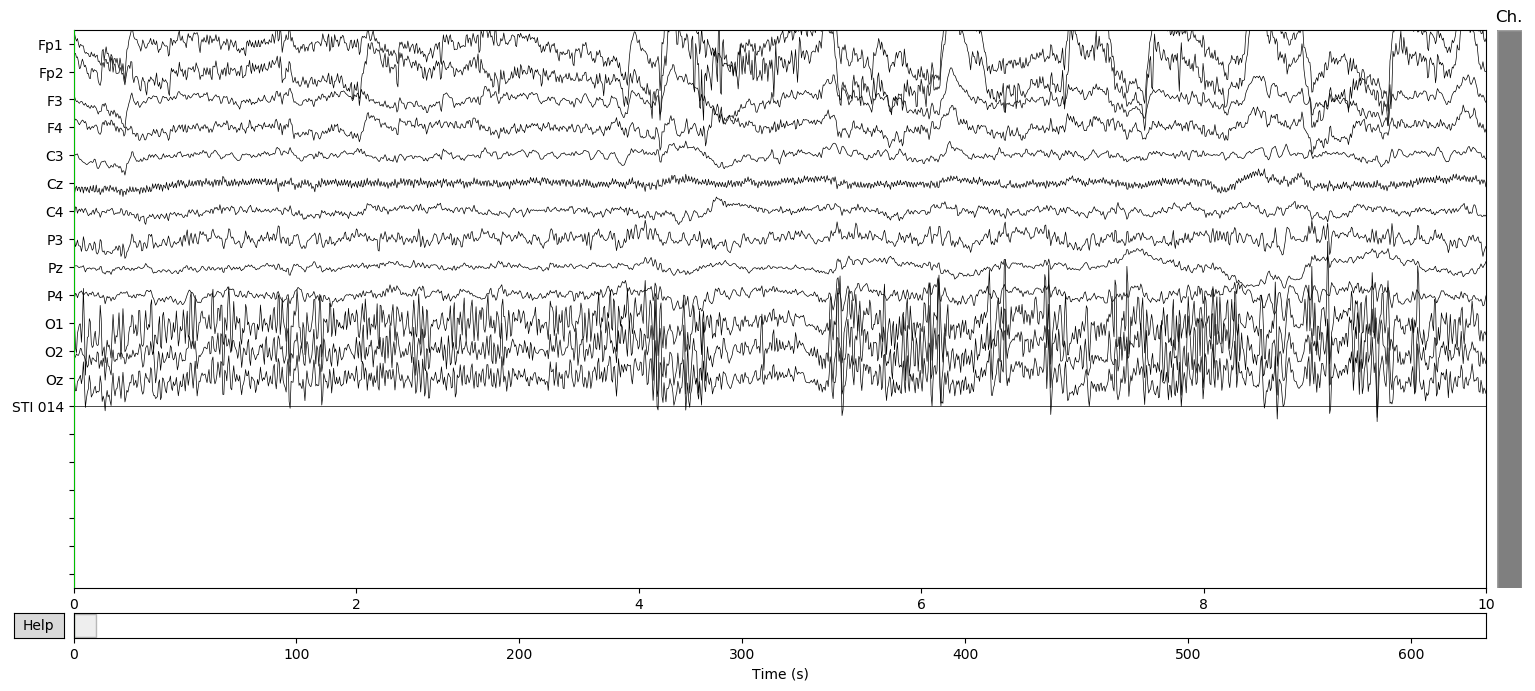

In [23]:
raw_fromfile.plot()